# 01. Importing Libraries

#### I had to use a different data set to the tech sales data I had as there was only 13 months of data which didn't work with the Decomposing Time-Series Data as it was too short so I sauced another data set on bike sales from https://github.com/shreyakhan/European-Bike-Sales-between-years-2013-2016.

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 
import datetime

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

# 02. Importing Data

In [2]:
# Project folder pathway

path = r'C:\Users\Hello\Desktop\Tech sales data\02 Data\Prepared Data'

In [3]:
# Importing cleaned housing data

df = pd.read_csv(os.path.join(path, 'Bike Sales.csv'))

# 03. Data Wrangling

In [4]:
# Checking shape

df.shape

(499, 18)

In [5]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [12]:
df=df.assign(Day=pd.to_datetime(df['Date']).dt.day,Year=pd.to_datetime(df['Date']).dt.year, Month=pd.to_datetime(df['Date']).dt.month)

In [13]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,day
0,26/11/2013,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26
1,26/11/2015,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26
2,23/03/2014,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,23
3,23/03/2016,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,23
4,15/05/2014,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,15


#### The data set only spans 4 years (2013-2016) and the sample size may not be large enough if analyzed on a yearly basis. As a result, this will be looked into on a monthly basis.

In [14]:
# Creating a new column with year and month combined

df['year & month'] = pd.to_datetime(df.Year.astype(str) + '-' + df.Month.astype(str))

In [15]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,day,year & month
0,26/11/2013,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26,2013-11-01
1,26/11/2015,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26,2015-11-01
2,23/03/2014,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,23,2014-03-01
3,23/03/2016,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,23,2016-03-01
4,15/05/2014,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,15,2014-05-01


In [17]:
df["count per month"] =df.groupby(["year & month"])["Order_Quantity"].transform("count")

In [18]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,day,year & month,count per month
0,26/11/2013,26,11,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26,2013-11-01,17
1,26/11/2015,26,11,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,26,2015-11-01,17
2,23/03/2014,23,3,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,23,2014-03-01,16
3,23/03/2016,23,3,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,23,2016-03-01,16
4,15/05/2014,15,5,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,15,2014-05-01,21


In [38]:
# Creating a new dataframe with median housing prices grouped by dates

data = df.groupby('year & month').agg({'count per month': ['median']})

In [39]:
# Checking headers

data.head()

,count per month
,median
year & month,
2013-01-01,2.0
2013-02-01,3.0
2013-03-01,6.0
2013-04-01,2.0
2013-05-01,3.0


Date is already set as index

In [40]:
# Checking data types

data.dtypes

count per month  median    float64
dtype: object

In [41]:
data

,count per month
,median
year & month,
2013-01-01,2.0
2013-02-01,3.0
2013-03-01,6.0
2013-04-01,2.0
2013-05-01,3.0
2013-06-01,4.0
2013-07-01,12.0
2013-08-01,18.0


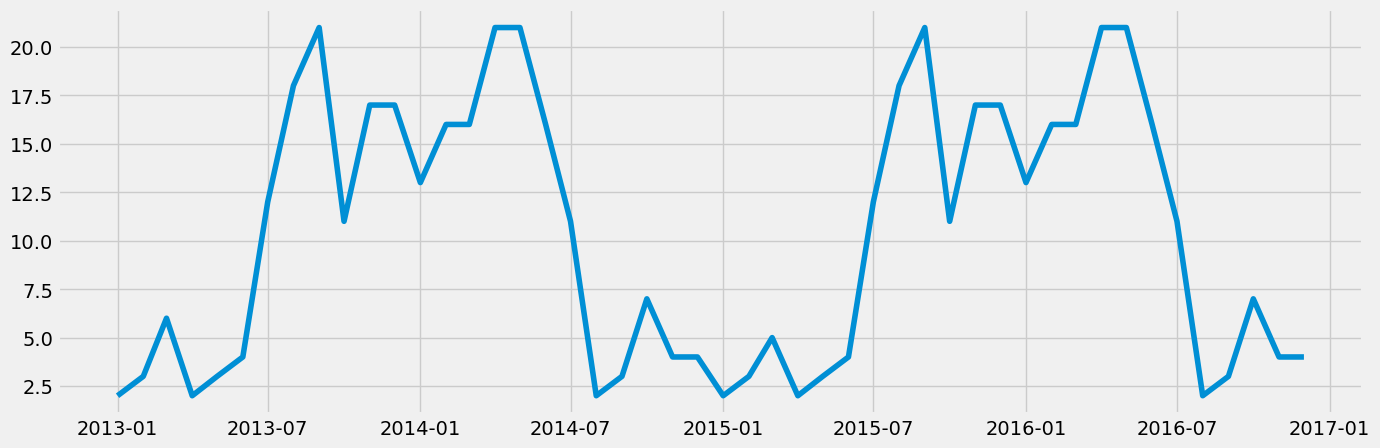

In [42]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### Data cleaning was conducted before download

# 04. Decomposing Time-Series Data

In [43]:
# Decomposing time series using 

decomp = sm.tsa.seasonal_decompose(data, model='additive')

In [44]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

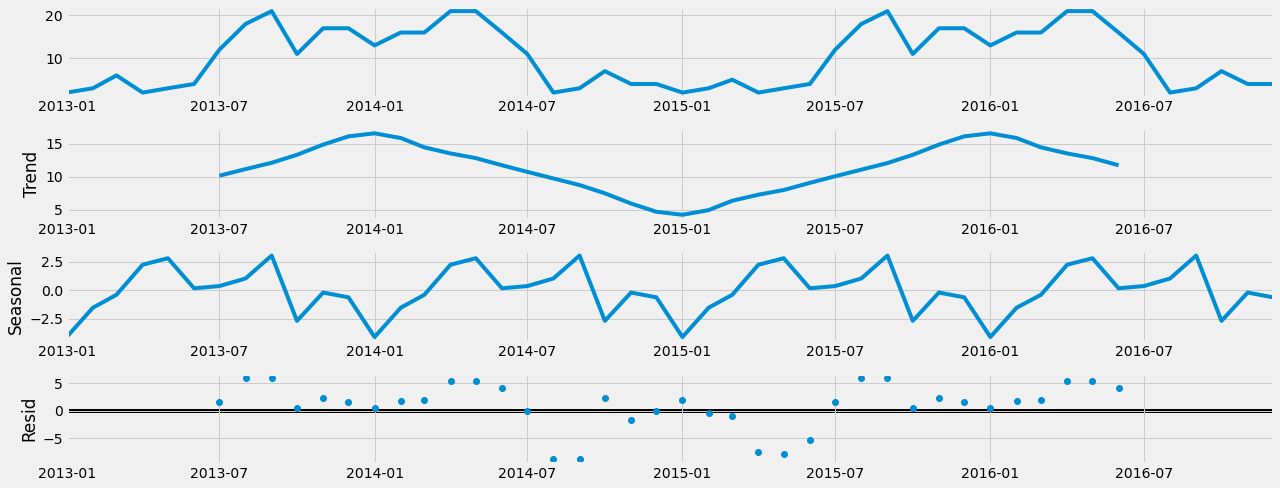

In [45]:
# Plotting decomposition of time-series data

decomp.plot()
plt.show()

The plot shows seasonality due to a pattern repeating itself at the same time each year, an upward trend of the median number of sales during the summer season and a downward trend in the winter. The first top and bottom charts appear different due to the data being unsmoothed and you can see a change to the trend in summer of 2014 to 2015 du to a recession

There appears to be some noise from due to data fluctuations.

# 05. Stationarity Test

### a. Dickey-Fuller Test

It is vital data is stationary, otherwise, we will not have a reliable basis to build the forecasting on. The presence of a data trend implies the data is non-stationary. A Dickey-Fuller test will be conducted to check for stationarity.

In [46]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['count per month'])

Dickey-Fuller Stationarity test:
Test Statistic                 -5.193388
p-value                         0.000009
Number of Lags Used            10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


#### H0 = Presence of a unit root (non-stationary)  
#### HA = Unit root present (stationary)  

The test statistic of -5.193388 is lower than the critical value (5%) of -2.943539, meaning the null hypothesis can be rejected.  As the p-value is more than 0.05 this shows that we should reject the null hypothesis making this data inconclusive

### b. Autocorrelation Test

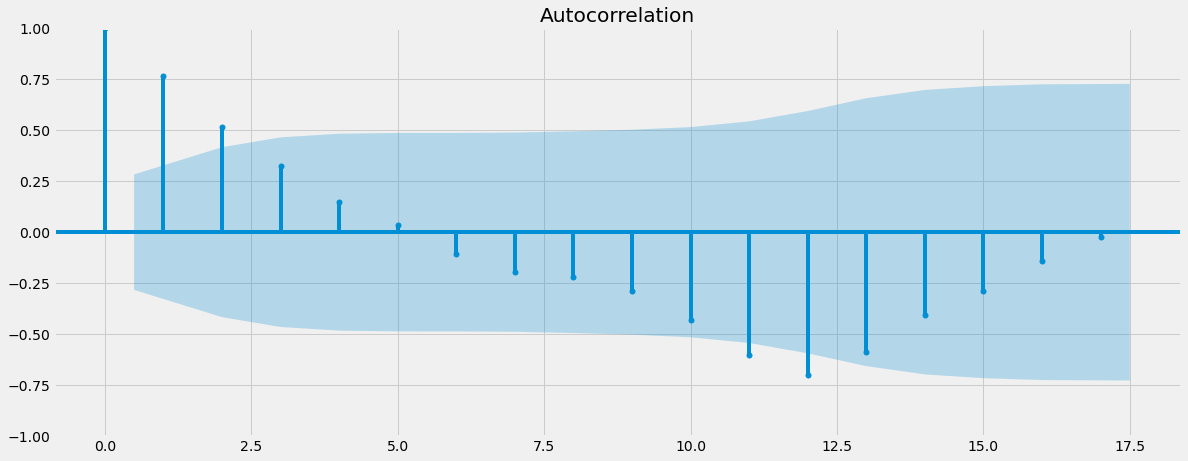

In [47]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

The test shows that there are vertical lines that go outside the blue edge of the confidence interval, indicating that the lags are significantly correlated with each other and the data is non-stationary.

# 06. Stationarizing Data

In [48]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [49]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [50]:
# Checking values and headers

data_diff.head()

,count per month
,median
year & month,
2013-02-01,1.0
2013-03-01,3.0
2013-04-01,-4.0
2013-05-01,1.0
2013-06-01,1.0


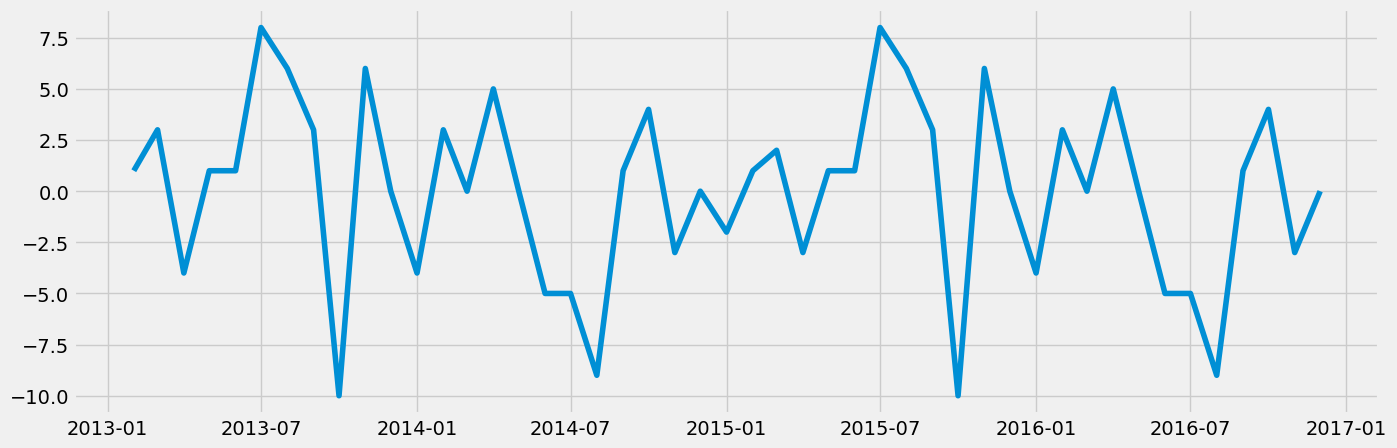

In [34]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.430848e+00
p-value                        1.698935e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    4.600000e+01
Critical Value (1%)           -3.581258e+00
Critical Value (5%)           -2.926785e+00
Critical Value (10%)          -2.601541e+00
dtype: float64


The results show that the data is now stationary. The test statistic value (-6.430848) is less than the critical value (5%) of -2.926785 and the p-value is greater than 0.05. Therefore, the test result isn't significant and the null hypothesis can't be rejected.

The autocorrelation plot has improved. The stationary is strong due to only 2 vertical lines going outside the confidence interval.